In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import statistics
import math
import numpy as np

In [94]:
data = pd.read_csv('data/merged.csv', index_col = 0)
data

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,...,loudness,speechiness,valence,tempo,lyric,debut_date,peak_position,peak_date,weeks_on_chart,billboard_rating
0,tim mcgraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.57500,0.491,0.000000,...,-6.462,0.0251,0.4250,76.009,He said the way my blue eyes shined Put those ...,09.23.06,40.0,01.13.07,20.0,1
1,a perfectly good heart,Taylor Swift,Taylor Swift,2006-10-24,220146,46,0.483,0.00349,0.751,0.000000,...,-5.726,0.0365,0.2680,156.092,Why would you wanna break a perfectly good hea...,NaN,NaN,NaN,NaN,0
2,invisible,Taylor Swift,Taylor Swift,2006-10-24,203226,48,0.612,0.63700,0.394,0.000000,...,-5.723,0.0243,0.2330,96.001,She can't see the way your eyes Light up when ...,NaN,NaN,NaN,NaN,0
3,our song,Taylor Swift,Taylor Swift,2006-10-24,201106,54,0.668,0.11100,0.672,0.000000,...,-4.931,0.0303,0.5390,89.011,I was ridin' shotgun with my hair undone In th...,10.13.07,16.0,01.19.08,36.0,2
4,mary's song,Taylor Swift,Taylor Swift,2006-10-24,213080,50,0.403,0.01770,0.627,0.000000,...,-5.280,0.0292,0.3740,74.900,"She said, I was seven and you were nine I look...",NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,snow on the beach,Midnights (3am Edition),Taylor Swift,2022-10-21,256124,85,0.659,0.73500,0.323,0.003210,...,-13.425,0.0436,0.1540,110.007,Snow On the Beach Lyrics I saw flecks of what ...,11.05.22,4.0,11.05.22,6.0,2
162,lavender haze,Midnights (3am Edition),Taylor Swift,2022-10-21,202395,86,0.735,0.20400,0.444,0.001200,...,-10.519,0.0684,0.0984,97.038,Lavender Haze Lyrics Meet me at midnight Stari...,11.05.22,2.0,11.05.22,6.0,2
163,high infidelity,Midnights (3am Edition),Taylor Swift,2022-10-21,231475,84,0.646,0.72300,0.529,0.000000,...,-10.179,0.0864,0.7550,87.862,High Infidelity Lyrics I didn't know you were ...,11.05.22,33.0,11.05.22,3.0,2
164,bejeweled,Midnights (3am Edition),Taylor Swift,2022-10-21,194165,86,0.700,0.06610,0.550,0.000102,...,-9.130,0.0653,0.4120,164.003,Bejeweled Lyrics Didn't notice you walkin' all...,11.05.22,6.0,11.05.22,6.0,2


In [95]:
# get subset of relevant spotify features + billboard binary
spotify = data.iloc[:,6:15]
spotify['album'] = data['album']
spotify['billboard_rating'] = data.iloc[:,-1]
features = list(spotify.columns)
del features[len(features) - 2:]
features

['danceability',
 'acousticness',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'valence',
 'tempo']

In [96]:
# Normalizing columns
for f in features:
    spotify[f] = (spotify[f]- spotify[f].mean()) / spotify[f].std()

print((spotify[features[0]]).mean()) # should be ~ zero
print((spotify[features[0]]).std()) # should be ~ 1

-3.424302341012531e-16
1.0


In [98]:
X = np.array(spotify[features])
y = np.array(spotify["billboard_rating"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

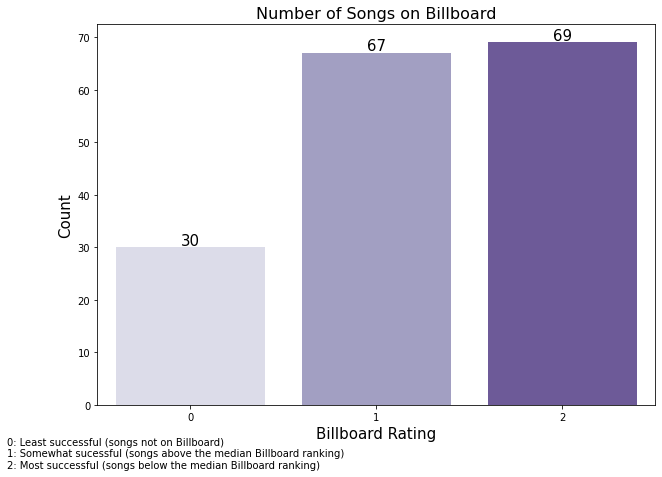

In [99]:
plt.figure(figsize = (10,7))
ax = sns.countplot(x=y, palette="Purples")
for p, label in zip(ax.patches, spotify["billboard_rating"].value_counts(ascending=True)):
    ax.annotate(label, ((p.get_x()+p.get_width()/2)-.05, p.get_height()+0.5), fontsize = 15)
plt.title("Number of Songs on Billboard",fontsize = 16)
plt.xlabel("Billboard Rating", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.figtext(0,0,"0: Least successful (songs not on Billboard)\n1: Somewhat sucessful (songs above the median Billboard ranking)\n2: Most successful (songs below the median Billboard ranking)")
plt.show()

In [100]:
model_lr = LogisticRegression().fit(X_train, y_train)
score = model_lr.score(X_test, y_test)
score # 36 % is not good

0.36

In [101]:
def evaluate_model(model):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred, average='weighted')
    confusionmatrix = confusion_matrix(y_test, y_pred)
    return {'y_pred': y_pred, 'accuracy': accuracy, 'f1': f1score, 'confusion': confusionmatrix}

def disp_confusion(c, title):
    sns.heatmap(c, annot=True, cmap="Purples")
    plt.title(f"Confusion Matrix for {title} Features", fontsize = 15)
    plt.figtext(0,-.1,"0: Least successful (songs not on Billboard)\n1: Somewhat sucessful (songs above the median Billboard ranking)\n2: Most successful (songs below the median Billboard ranking)");

In [102]:
lr_results = evaluate_model(model_lr)
print(f"Accuracy: {lr_results['accuracy']}\nF1 Score: {lr_results['f1']}\n")

Accuracy: 0.36
F1 Score: 0.32161254199328115



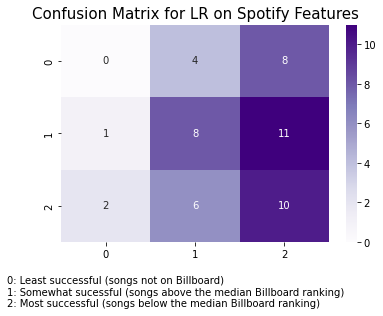

In [103]:
disp_confusion(lr_results['confusion'], title="LR on Spotify")

In [104]:
model_rf = RandomForestClassifier().fit(X_train, y_train)

In [105]:
rf_results = evaluate_model(model_rf)
print(f"Accuracy: {rf_results['accuracy']}\nF1 Score: {rf_results['f1']}\n")

Accuracy: 0.38
F1 Score: 0.32950904392764857



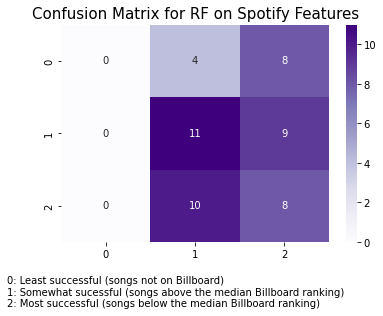

In [106]:
disp_confusion(rf_results['confusion'], title="RF on Spotify")

In [134]:
# NOT NEEDED
# plt.figure(figsize=[15,6])
# sns.barplot(x=features, y=model_rf.feature_importances_, palette = 'Purples')
# plt.title("Feature Importance for Spotify Features on RF Model", fontsize = 20)
# plt.xlabel("Features", fontsize = 15)
# plt.ylabel("Feature Importance", fontsize = 15);

In [108]:
tfidf = pd.read_csv('data/tfidf_embedding.csv')
sum(tfidf['name'] == data["name"]) == len(data) # songs are in the same order in the tfidf and data dataframes

True

In [109]:
tfidf = tfidf.drop('name', axis=1)
features = tfidf.columns
tfidf

,15,16,16th,17,18,1950,20,2003,22,29th,...,years,yell,yes,yesterday,yeugh,yogurt,york,young,younger,youyou
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162,0.0,0.0,0.0,0.0,0.0,0.183486,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
163,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.201775,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# features = list(tfidf.columns)

# # Normalizing columns
# for f in features:
#     tfidf[f] = (tfidf[f]- tfidf[f].mean()) / tfidf[f].std()

# print((tfidf[features[0]]).mean()) # should be ~ zero
# print((tfidf[features[0]]).std()) # should be ~ 1
# # DO I NEED TO DO THIS???

In [110]:
x = np.array(tfidf)
y = np.array(data["billboard_rating"])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### todo: histogram of words ??

In [111]:
model_lr = LogisticRegression().fit(X_train, y_train)
score = model_lr.score(X_test, y_test)
score # 50 % is not good

0.46

In [112]:
lr_results = evaluate_model(model_lr)
print(f"Accuracy: {lr_results['accuracy']}\nF1 Score: {lr_results['f1']}\n")

Accuracy: 0.46
F1 Score: 0.3977027027027027



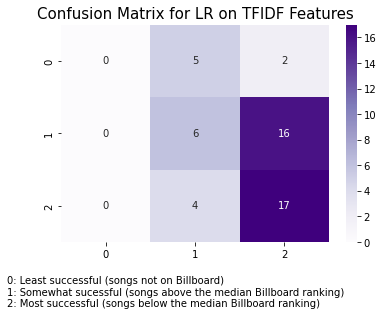

In [118]:
# Fails to classify the songs that did not make it on the billboard
disp_confusion(lr_results['confusion'], title="LR on TFIDF")

In [131]:
model_rf = RandomForestClassifier().fit(X_train, y_train)

In [132]:
rf_results = evaluate_model(model_rf)
print(f"Accuracy: {rf_results['accuracy']}\nF1 Score: {rf_results['f1']}\n")

Accuracy: 0.42
F1 Score: 0.3680985221674877



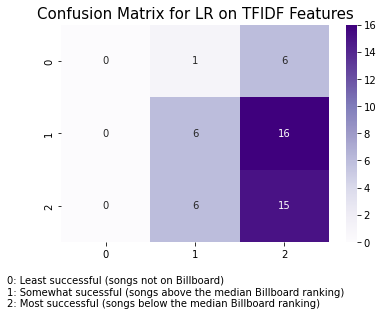

In [133]:
disp_confusion(rf_results['confusion'], title="LR on TFIDF")

## TFIDF Kmeans and PCA:

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
tfidf = pd.read_csv('data/tfidf_embedding.csv')
tfidf

In [ ]:
# Function to get album
def get_album(song, spotify):
    return (spotify.loc[spotify.name == song,'album']).to_string(index=False)

tfidf_df = tfidf.loc[:, tfidf.columns != 'name']

In [ ]:
# Elbow method to determine optimal number of clusters
ss_dist = []
K = range(2,15) # possible number of clusters
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(tfidf_df)
    ss_dist.append(kmeans.inertia_)
plt.plot(K,ss_dist,'bx-')
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show(); # Shows that there is no optimal number of clusters

In [ ]:
# For a 10 clusters solution maybe the songs are aligned by albums
kmeans = KMeans(n_clusters=8)
kmeans.fit(tfidf_df)
clusters = kmeans.labels_
pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(tfidf_df)
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]
print(pca.explained_variance_ratio_)
data1 = data.copy()
data1['Cluster'] = clusters
data1['x0'] = x0
data1['x1'] = x1

In [ ]:
# Cluster by album
pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(tfidf_df)
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]
print(pca.explained_variance_ratio_)
data1['Album'] = spotify1['album']
data1['x0'] = x0
data1['x1'] = x1

# # set image size
plt.figure(figsize=(12, 7))
# set title
plt.title("Taylor Swift Lyrics TF-IDF Colored by Album", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
#  create scatter plot with seaborn, where hue is the class used to group the spotify
sns.scatterplot(data=data1, x='x0', y='x1', hue='Album', palette="viridis")
plt.show()
